In [3]:
import pandas as pd
import scipy.stats as ss

# 正态分布检验

In [2]:
norm_dist = ss.norm.rvs(size=20)

In [3]:
norm_dist

array([ 1.1419342 , -1.19108409,  1.77456353, -0.28028238, -0.9380629 ,
       -0.18997688,  0.48714099, -1.98952408, -0.72544061,  0.89273866,
        0.59667721, -0.17358157, -0.70473654, -1.03133761, -2.00330226,
        0.01980264, -1.22856663, -1.9024601 ,  0.88892048,  1.14257121])

In [4]:
# P值pvalue>0.05, 符合假设为正态分布
ss.normaltest(norm_dist)

NormaltestResult(statistic=1.4918332045343363, pvalue=0.4742993567696848)

卡方检验

In [6]:
# 返回的P值很小，拒绝假设
ss.chi2_contingency([[15,95],[85,5]])

(126.08080808080808,
 2.9521414005078985e-29,
 1,
 array([[55., 55.],
        [45., 45.]]))

T检验

In [7]:
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))

Ttest_indResult(statistic=-0.028638728991661668, pvalue=0.9773558766263784)

In [8]:
ss.ttest_ind(ss.norm.rvs(size=100),ss.norm.rvs(size=200))

Ttest_indResult(statistic=1.4152915128577224, pvalue=0.15802721258806063)

方差检验 F检验

In [9]:
# P值<0.05, 拒绝假设
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

# qqplot

In [4]:
from statsmodels.graphics.api import qqplot

In [5]:
from matplotlib import pyplot as plt

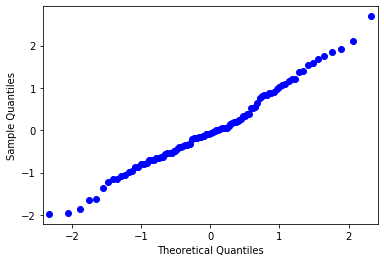

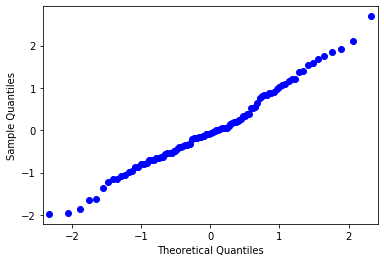

In [13]:
# 返回曲线在角平分线上则认为是正态分布
qqplot(ss.norm.rvs(size=100))

# 相关系数

In [6]:
import pandas as pd
import numpy as np

In [15]:
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])

In [16]:
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])

In [17]:
s1.corr(s2)

0.9333729600465923

In [18]:
s1.corr(s2, method='spearman')

0.7142857142857144

通过df实现

In [25]:
df = pd.DataFrame(np.array([s1,s2]).T)

In [26]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [27]:
df.corr(method='spearman')

,0,1
0,1.000000,0.714286
1,0.714286,1.000000


# 线性回归检验

In [29]:
x = np.arange(10).astype(np.float).reshape((10,1))

In [30]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [32]:
y = x*3+4+np.random.random((10,1))

In [33]:
y

array([[ 4.58650465],
       [ 7.10201557],
       [10.22096969],
       [13.98753444],
       [16.00844871],
       [19.50062735],
       [22.21831682],
       [25.7772254 ],
       [28.49115553],
       [31.76760077]])

In [7]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
# 拟合
res=reg.fit(x,y)

In [38]:
# 预测值
y_pred = reg.predict(x)

In [39]:
y_pred

array([[ 4.32095855],
       [ 7.35319885],
       [10.38543915],
       [13.41767945],
       [16.44991974],
       [19.48216004],
       [22.51440034],
       [25.54664064],
       [28.57888093],
       [31.61112123]])

In [40]:
# 参数
reg.coef_

array([[3.0322403]])

In [42]:
# 截距
reg.intercept_

array([4.32095855])

# PCA变换

In [8]:
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T

In [45]:
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [46]:
from sklearn.decomposition import PCA

In [47]:
lower_dim = PCA(n_components=1)

In [48]:
lower_dim.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
# 降维后的信息量
lower_dim.explained_variance_ratio_

array([0.96318131])

In [50]:
# 通过 奇异值分解方法 (SVD) 得到转化后的值
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [52]:
from scipy import linalg

In [53]:
def pca(data_mat, topNfeat=1000000):
    mean_vals = np.mean(data_mat, axis=0)
    mid_mat = data_mat - mean_vals
    cov_mat = np.cov(mid_mat, rowvar=False)
    eig_vals, eig_vects = linalg.eig(np.mat(cov_mat))
    eig_val_index = np.argsort(eig_vals)
    eig_val_index = eig_val_index[:-(topNfeat + 1):-1]
    eig_vects = eig_vects[:, eig_val_index]
    low_dim_mat = np.dot(mid_mat, eig_vects)
    # ret_mat = np.dot(low_dim_mat,eig_vects.T)
    return low_dim_mat, eig_vals

In [1]:
pca(data,topNfeat=1)

NameError: name 'pca' is not defined